<a href="https://colab.research.google.com/github/ViniciusPagote/Dashboard-Pre-o-Varejo-Gasolina/blob/main/Projeto_01_Pre%C3%A7o_de_Varejo_dos_Combustiveis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pacotes

#Modelagem de dados
import pandas as pd
import numpy as np

#Analises graficas
import matplotlib.pyplot as plt
import seaborn as sns

#Avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Ler a Base de dados
Base_Dados = pd.read_csv('Dados Preco Combutivel.csv')
Base_Dados.head()

,Data,Ano,Mes,Produto,Valor_Venda
0,2012-01-01,2012,1,DIESEL,2.027764
1,2012-01-01,2012,1,DIESEL S50,2.083545
2,2012-01-01,2012,1,ETANOL,1.873515
3,2012-01-01,2012,1,GASOLINA,2.646635
4,2012-01-01,2012,1,GNV,1.377651


In [ ]:
# Verificar os ultimos registros
Base_Dados.tail()

,Data,Ano,Mes,Produto,Valor_Venda
595,2021-12-01,2021,12,DIESEL S10,5.378765
596,2021-12-01,2021,12,ETANOL,4.999802
597,2021-12-01,2021,12,GASOLINA,6.392753
598,2021-12-01,2021,12,GASOLINA ADITIVADA,6.651852
599,2021-12-01,2021,12,GNV,4.072493


In [ ]:
#Tipos das colunas
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         600 non-null    object 
 1   Ano          600 non-null    int64  
 2   Mes          600 non-null    int64  
 3   Produto      600 non-null    object 
 4   Valor_Venda  600 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 23.6+ KB


In [ ]:
#Estatisticas descritiva
Base_Dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ano,600.0,2016.620000,2.917153,2012.000000,2014.00000,2017.000000,2019.000000,2021.000000
Mes,600.0,6.518333,3.493805,1.000000,3.00000,7.000000,10.000000,12.000000
Valor_Venda,600.0,2.962142,0.965252,1.369044,2.21376,2.859706,3.461894,6.696749


In [ ]:
#Filtro GASOLINA
Base_Dados[Base_Dados.Produto == 'GASOLINA'].describe()

,Ano,Mes,Valor_Venda
count,117.000000,117.000000,117.000000
mean,2016.512821,6.495726,3.621738
std,2.884607,3.500305,0.871627
min,2012.000000,1.000000,2.605125
25%,2014.000000,3.000000,2.818931
50%,2017.000000,7.000000,3.486603
75%,2019.000000,10.000000,4.120173
max,2021.000000,12.000000,6.420732


In [ ]:
# Loop
for Produto in Base_Dados.Produto.unique():
  print (Produto)
  print (Base_Dados[Base_Dados.Produto == Produto].describe(), '\n')

DIESEL
               Ano         Mes  Valor_Venda
count   117.000000  117.000000   117.000000
mean   2016.512821    6.495726     3.005245
std       2.884607    3.500305     0.692166
min    2012.000000    1.000000     2.017308
25%    2014.000000    3.000000     2.430653
50%    2017.000000    7.000000     2.902562
75%    2019.000000   10.000000     3.398895
max    2021.000000   12.000000     5.237843 

DIESEL S50
          Ano        Mes  Valor_Venda
count    12.0  12.000000    12.000000
mean   2012.0   6.500000     2.156385
std       0.0   3.605551     0.073805
min    2012.0   1.000000     2.005000
25%    2012.0   3.750000     2.113351
50%    2012.0   6.500000     2.167663
75%    2012.0   9.250000     2.225344
max    2012.0  12.000000     2.230807 

ETANOL
               Ano         Mes  Valor_Venda
count   117.000000  117.000000   117.000000
mean   2016.512821    6.495726     2.489714
std       2.884607    3.500305     0.715070
min    2012.000000    1.000000     1.713138
25%    2014.0

In [ ]:
#Verificando o index
Base_Dados.index

RangeIndex(start=0, stop=600, step=1)

In [ ]:
#Antes
pd.to_datetime(Base_Dados.index)

DatetimeIndex(['2012-01-01', '2012-01-01', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-02-01', '2012-02-01', '2012-02-01',
               '2012-02-01', '2012-02-01',
               ...
               '2021-11-01', '2021-11-01', '2021-11-01', '2021-11-01',
               '2021-12-01', '2021-12-01', '2021-12-01', '2021-12-01',
               '2021-12-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Data', length=600, freq=None)

In [ ]:
#Depois
Base_Dados.set_index('Data', inplace=True)

KeyError: ignored

In [ ]:
# Convertendo o index
Base_Dados.index = pd.to_datetime( Base_Dados.index )


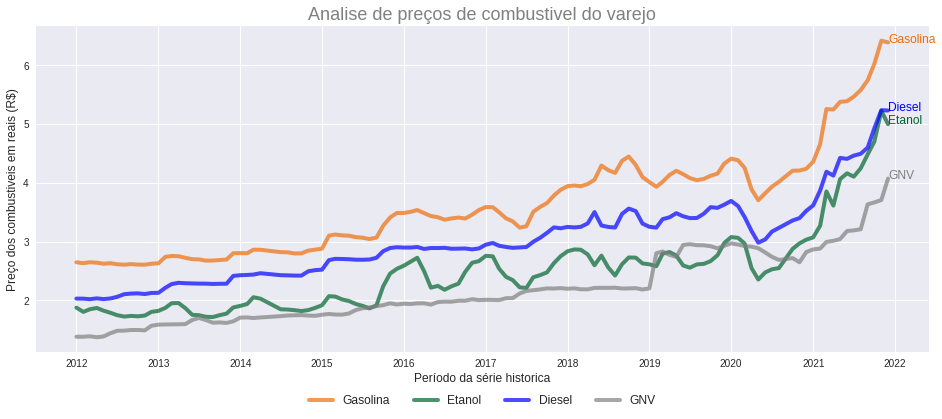

In [ ]:
#Filtrando os Preços
Analise_Gasolina = Base_Dados[Base_Dados.Produto == 'GASOLINA']
Analise_Etanol = Base_Dados[Base_Dados.Produto == 'etanol'.upper()]
Analise_Diesel = Base_Dados[Base_Dados.Produto == 'diesel'.upper()]
Analise_GNV = Base_Dados[Base_Dados.Produto == 'GNV'.upper()]

#Tamanho do grafico
plt.figure( figsize=(16,6))

#Estilo do Grafico
plt.style.use('seaborn')

#Titulo
plt.title('Analise de preços de combustivel do varejo', fontsize=18, color='gray')

#Labels
plt.xlabel('Período da série historica', fontsize = 12)
plt.ylabel('Preço dos combustiveis em reais (R$)', fontsize = 12)

#Plots
plt.plot(Analise_Gasolina.Valor_Venda, linewidth=4, alpha=0.7, color='#ED6e0c')
plt.text(Analise_Gasolina.index[-1], Analise_Gasolina.Valor_Venda.tail(1), 'Gasolina', color='#ED6e0c', fontsize='12')

plt.plot(Analise_Etanol.Valor_Venda, linewidth=4, alpha=0.7, color='#00652E')
plt.text(Analise_Etanol.index[-1], Analise_Etanol.Valor_Venda.tail(1), 'Etanol', color='#00652E', fontsize='12')

plt.plot(Analise_Diesel.Valor_Venda, linewidth=4, alpha=0.7, color='blue')
plt.text(Analise_Diesel.index[-1], Analise_Diesel.Valor_Venda.tail(1), 'Diesel', color='blue', fontsize='12')

plt.plot(Analise_GNV.Valor_Venda, linewidth=4, alpha=0.7, color='gray')
plt.text(Analise_GNV.index[-1], Analise_GNV.Valor_Venda.tail(1), 'GNV', color='gray', fontsize='12')

#Legenda
plt.legend(['Gasolina','Etanol','Diesel','GNV'], fontsize=12, ncol=4, loc='center',  
           bbox_to_anchor=(0.5, -0.15), shadow=True
           );

plt.savefig('Projeto2.png')